In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


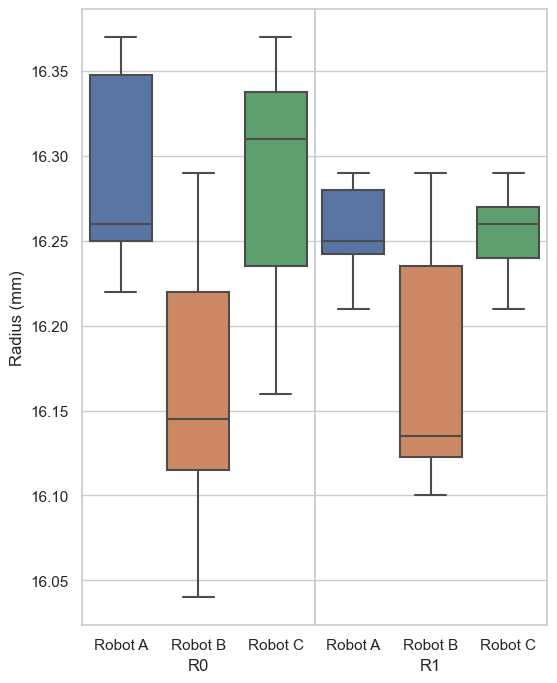

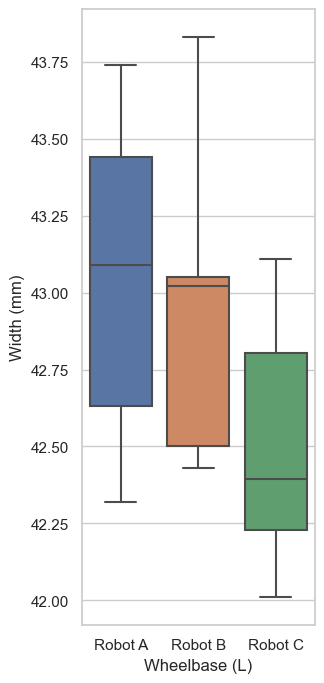

In [56]:
# baseline = pd.read_csv('square/xy_baseline_error.csv')
# # baseline -= 500
# calibrated = pd.read_csv('square/xy_post_error.csv')
# calibrated -= 500
measurements = pd.read_csv('r0r1L.csv')
# remove first column
measurements = measurements.iloc[:, 1:]

robota = measurements[:10]
robotb = measurements[10:20]
robotc = measurements[20:30]



# add a type column
# baseline['type'] = 'Baseline'
# calibrated['type'] = 'Calibrated'
# # combine them
# df = pd.concat([robota['R0'], robota['R1'], robota['L'], robotb['R0'], robotb['R1'], robotb['L'], robotc['R0'], robotc['R1'], robotc['L']], axis=1)
# # Reshape
# df_melted = df.melt(var_name='Robot', value_name='Value')

# plot the R0 values for each robot together
# sns.set(style="whitegrid")
# plt.figure(figsize=(8, 12))
# set font size


R0 = pd.concat([robota['R0'], robotb['R0'], robotc['R0']], axis=1)
R1 = pd.concat([robota['R1'], robotb['R1'], robotc['R1']], axis=1)
L = pd.concat([robota['L'], robotb['L'], robotc['L']], axis=1)
R0.columns = ['Robot A R0', 'Robot B R0', 'Robot C R0']
R1.columns = ['Robot A R1', 'Robot B R1', 'Robot C R1']
L.columns = ['Robot A L', 'Robot B L', 'Robot C L']

# plot R0 and R1 side by side
fig, axs = plt.subplots(1, 2, sharey=True,figsize=(6, 8))
plt.rcParams.update({'font.size': 16})

sns.boxplot(data=R0, showfliers=False, ax=axs[0])
axs[0].set_ylabel('Radius (mm)')
axs[0].set_xticks([0, 1, 2])
axs[0].set_xticklabels(['Robot A', 'Robot B', 'Robot C'])
axs[0].set_xlabel('R0')

sns.boxplot(data=R1, showfliers=False, ax=axs[1])
# axs[1].set_ylabel('Radius (mm)')
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(['Robot A', 'Robot B', 'Robot C'])
axs[1].set_xlabel('R1')

fig.subplots_adjust(wspace=0)  # remove the gap between subplots

plt.show()

# plot L
plt.figure(figsize=(3, 8))
sns.boxplot(data=L, showfliers=False)
plt.ylabel('Width (mm)')
plt.xticks([0, 1, 2], ['Robot A', 'Robot B', 'Robot C'])
plt.xlabel('Wheelbase (L)')
plt.show()

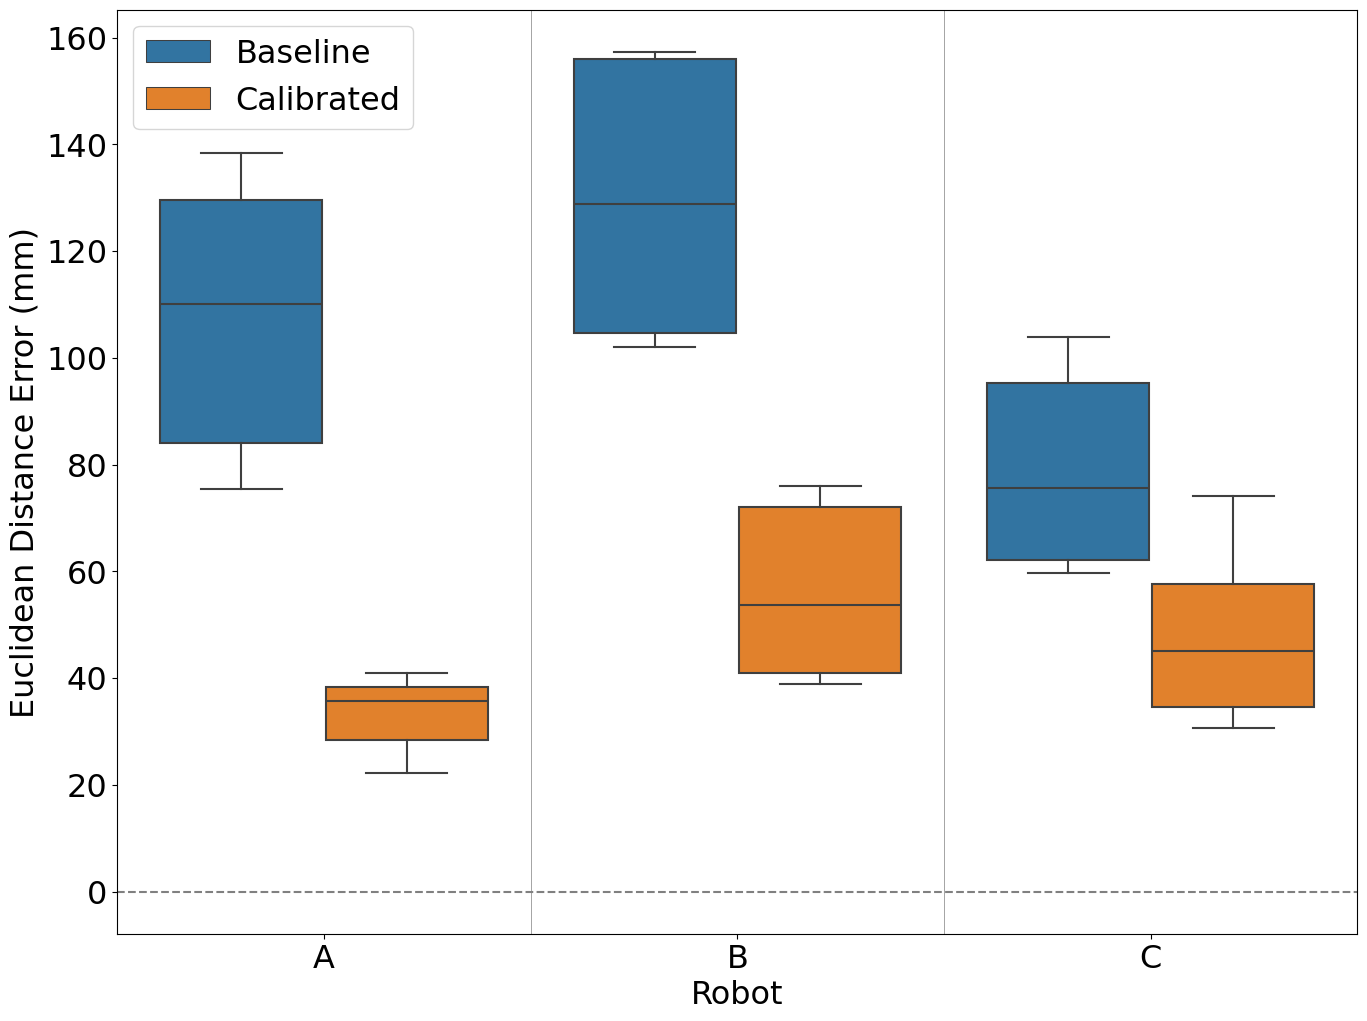

In [6]:
baseline = pd.read_csv('square/xy_baseline_error.csv')
# baseline -= 500
calibrated = pd.read_csv('square/xy_post_error.csv')
# calibrated -= 500

# add a type column
baseline['type'] = 'Baseline'
calibrated['type'] = 'Calibrated'
# combine them
df = pd.concat([baseline, calibrated])
# Reshape
df_melted = df.melt(id_vars='type', var_name='Robot', value_name='Euclidean Distance Error (mm)')

# plot
plt.figure(figsize=(16, 12))
# update the font size
plt.rcParams.update({'font.size': 23})
plt.axhline(0, color='grey', linestyle='--', zorder=1)
sns.boxplot(x='Robot', y='Euclidean Distance Error (mm)', hue='type', data=df_melted, zorder=2)

# add vertical lines to separate robots
num_robots = df_melted['Robot'].nunique()
for x in np.arange(0.5, 1*num_robots, 1):
    plt.axvline(x, color='grey', linestyle='-', linewidth = 0.5, zorder=1)

plt.legend(loc='upper left', fontsize=23)
# plt.ylim(-14, 6)
plt.show()

In [3]:
baseline = pd.read_csv('baseline_linear.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'baseline_linear.csv'